# Predicting Titanic Survivors with Machine Learning

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

<img src="titanic.jpg">

In this project we are going to accurately predict if a passenger survived the sinking of the Titanic or not. We have to rename the 'Survived' column in the test dataset a 0 or 1 value. For this we are going to explore machine learning workflow to predict which passengers survived the tragedy.

# Predict survival on the Titanic:
1. First thing we will do for the data:
   -  CSV Loading the datasets with Pandas
   -  Visualizing missing data 
   -  Checking relationships between survival and individual factors
2. Feature Extraction/Feature Engineering
2. Data Modelling
3. Model Evaluation

Loading Modules

In [1315]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the datasets with Pandas
Loading train and test dataset

In [1316]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
combine = [df_train, df_test]

# Looking into the training dataset
Printing first 5 rows of the train dataset

In [1317]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 we can see the  information about each columns of the dataset:

1. __PassengerId__:  An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

2. __Survived__: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. __Pclass__: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. __Name__: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. __Sex__: Passenger's sex. It's either Male or Female.

6. __Age__: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. __SibSp__: Number of siblings or spouses travelling with each passenger.

8. __Parch__: Number of parents of children travelling with each passenger.
9. __Ticket__: Ticket number.
10. __Fare__: How much money the passenger has paid for the travel journey.
11. __Cabin__: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. __Embarked__: Port from where the particular passenger was embarked/boarded.

__Total rows and columns for df_train__

In [1318]:
df_train.shape

(891, 12)

We can see that there are 891 rows and 12 columns in our training dataset.

__Describing training dataset__

describe() method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [1319]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe(include = ['O']) will show the descriptive statistics of object data types.

In [1320]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Davidson, Mr. Thornton",male,1601,B96 B98,S
freq,1,577,7,4,644


As you can see its shows that there are duplicate Ticket number and Cabins shared. The highest number of duplicate ticket number is "CA. 2343". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4. They are using cabin number "C23 C25 C27".

We also see that 644 people were embarked from port "S".

Among 891 rows, 577 were Male and the rest were Female.

Lets use now  info() method to see more information of our train dataset.

In [1321]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After info() for the training dataset We can see that Age value is missing for many rows.

Out of 891 rows, the Age value is present only in 714 rows.

Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have Cabin values.

In [1322]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see the 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information

In [1323]:
df_test.shape

(418, 11)

We can see here the Survived column is not present in df_Test data. We have to train our classifier using the Train data and generate predictions (Survived) on df_Test data

In [1324]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1325]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As you can see There are missing entries for Age in df_Test dataset as well.

Out of 418 rows in df_Test dataset, only 332 rows have Age value.

Cabin values are also missing in many rows. Only 91 rows out ot 418 have values for Cabin column.

In [1326]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 rows with missing Age, 327 rows with missing Cabin and 1 row with missing Fare information.

__Total rows and columns__ for df_train and df_test

No lets take a look into the testing dataset

Test data has 418 rows and 11 columns.

df_Train data rows = 891

df_Test data rows = 418

Total rows = 891+418 = 1309

We can see that around 2/3 of total data is set as df_Train data and around 1/3 of total data is set as df_Test data.

__Lets summary the data briefly__:
The Name, Sex, Ticket, Cabin, and Embarked are listed as strings The remaining lists (PassengerId, Age, SibSp, Parch, and Fare) are reported as integers in df_train and df_test, but some of them represent categories of values. These nominal values must be converted to dummy variables when creating models
Many of the columns have some missing values, and are difficult to conceptualize when reported in a table form (using info()). 

 we are going to Check the  relationships between Features and Survival.

In [1327]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploring the Data

__Relationship between Features and Survival__


In this section, we analyze relationship between different features with respect to Survival. We see how different feature values show different survival chance. We also plot different kinds of diagrams to visualize our data and findings.

In [1328]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


__Sex vs. Survival__

In [1329]:
df_train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


__Age vs. Survival__

Ks_2sampResult(statistic=0.0887768379960963, pvalue=0.1255558124005897)

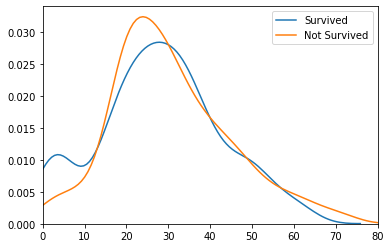

In [1330]:
age_survived = df_train.loc[df_train['Survived'] == 1]['Age'].dropna()
age_dead = df_train.loc[df_train['Survived'] == 0]['Age'].dropna()

fig = sns.kdeplot(age_survived, label='Survived', clip=[0,80])
fig.set(xlim=(0, 80))
sns.kdeplot(age_dead, label='Not Survived')

ks_2samp(age_survived, age_dead)

__SibSp vs survival__

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


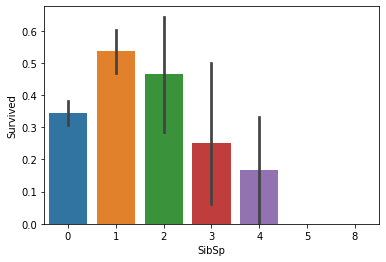

In [1331]:
sns.barplot(df_train['SibSp'], df_train['Survived'])
display(df_train[['Parch', 'Survived']].groupby('Parch').mean())

__Parch vs. Survival__

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


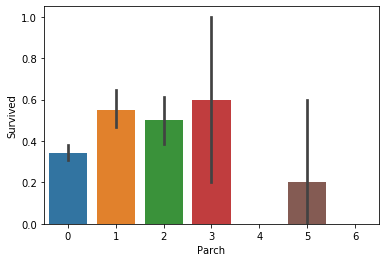

In [1332]:
sns.barplot(df_train['Parch'], df_train['Survived'])
display(df_train[['Parch', 'Survived']].groupby('Parch').mean())

__Fare vs. Survival__

Ks_2sampResult(statistic=0.30236794171220405, pvalue=1.8678359776799793e-17)

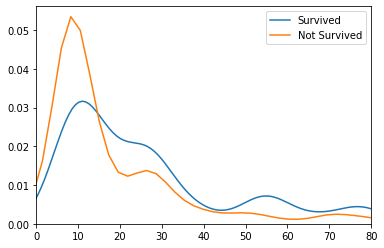

In [1333]:
Fare_survived = df_train.loc[df_train['Survived'] == 1]['Fare'].dropna()
Fare_dead = df_train.loc[df_train['Survived'] == 0]['Fare'].dropna()

fig = sns.kdeplot(Fare_survived, label='Survived', clip=[0,80])
fig.set(xlim=(0, 80))
sns.kdeplot(Fare_dead, label='Not Survived')
ks_2samp(Fare_survived, Fare_dead)

__Embarked vs. Survival__

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


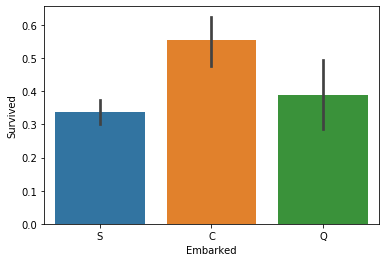

In [1334]:
sns.barplot(df_train['Embarked'], df_train['Survived'])
display(df_train[['Embarked', 'Survived']].groupby('Embarked').mean())

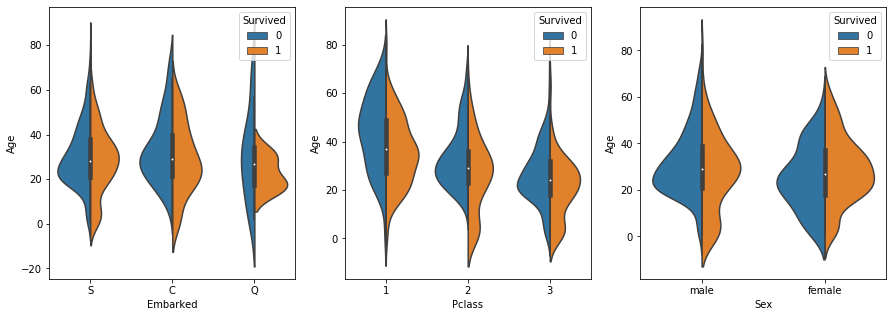

In [1335]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df_train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, split=True, ax=ax3)

From Pclass violinplot, we can see that:

1st Pclass has very few children and more old people as compared to other two classes.
Almost all children (between age 0 to 10) of 2nd Pclass survived.
Most children of 3rd Pclass survived.
Younger people of 1st Pclass survived as compared to its older people.
From Sex violinplot, we can see that:

Most male children (between age 0 to 14) survived.
Females with age between 18 to 40 have better survival chance.

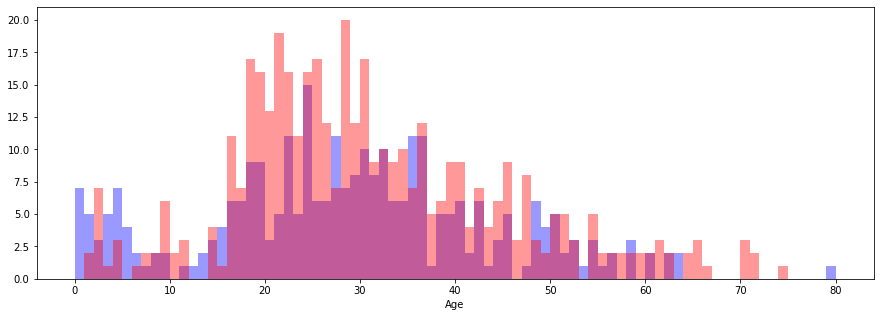

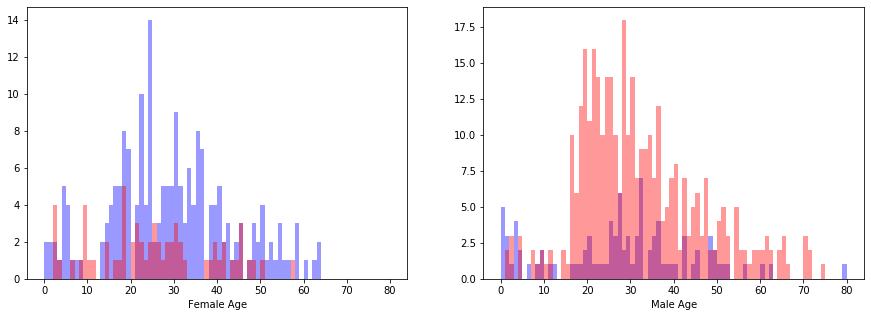

In [1336]:
total_survived = df_train[df_train['Survived']==1]
total_not_survived = df_train[df_train['Survived']==0]
male_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="male")]
female_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="female")]
male_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="male")]
female_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="female")]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

According to this figures, we can observe that:

For the combination of male and female, we can see that children with age between 0 to 5 have better chance to survived.
Females with age between "18 to 40" and "50 and above" have higher chance to survived.
Males with age between 0 to 14 have better chance to survived.

__Checking correlation between survival and categorical factors__

In [1337]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Positive numbers = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.

Negative numbers = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.

In our case, we focus on which features have strong positive or negative correlation with the Survived feature.

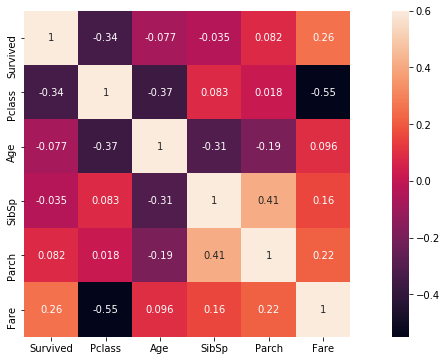

In [1338]:
plt.figure(figsize=(15,6))
sns.heatmap(df_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

# Preprocessing the Data

In [1356]:
# %load functions.py
def process_missing(df):
    df["Fare"] = df["Fare"].fillna(df_train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [1342]:
def pre_process(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)

    for col in ["Age_categories","Fare_categories",
                "Title","Cabin_type","Sex"]:
        df = create_dummies(df,col)
    
    return df

df_train = pre_process(df_train)
df_test = pre_process(df_test)

In [1343]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0


(Survived, Pclass,Age, SibSp, Parch	and Fare) have relationships

In [1345]:
explore_cols = ["SibSp","Parch","Survived"]
explore = df_train[explore_cols].copy()
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
SibSp       891 non-null int64
Parch       891 non-null int64
Survived    891 non-null int64
dtypes: int64(3)
memory usage: 21.0 KB


__Feature Extraction__
-  Engineering New Features

We are going to select the appropriate features to train our classifier by creating a new features based on existing features. We also convert categorical features into numeric form.

In [1347]:
def process_isalone(df):
    df["familysize"] = df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"] = 0
    df.loc[(df["familysize"] == 0),"isalone"] = 1
    df = df.drop("familysize",axis=1)
    return df

df_train = process_isalone(df_train)
df_test = process_isalone(df_test)

# Selecting the Best-Performing Features

In [1349]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    # Remove non-numeric columns, columns that have null values
    df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["Survived","PassengerId"],axis=1)
    all_y = df["Survived"]
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf,cv=10)
    selector.fit(all_X,all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

cols = select_features(df_train)


Best Columns 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Fare_categories_12-50', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']



# Selecting and Tuning Different Algorithms

In [1352]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Survived"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(df_train,cols)


LogisticRegression
------------------
Best Score: 0.8204264870931538
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.7755331088664422
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.8294051627384961
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 4}



 as we can see that LogisticRegression and Random Forest classfiers have the best score.

Among these two, we choose Random Forest classifier as it has the ability to limit overfitting 

# Submission to Kaggle

In [1355]:
def save_submission_file(model,cols,filename="submission.csv"):
    Test_data = df_test[cols]
    predictions = model.predict(Test_data)
    
    holdout_ids = df_test["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
    submission = pd.DataFrame(submission_df)

    submission.to_csv(filename,index=False)

best_rf_model = result[2]["best_model"]
save_submission_file(best_rf_model,cols)